<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/biotech_patent_reduction_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import json 
# from transformers import AutoTokenizer, BioGptModel
# import torch
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
import joblib
# import scann

In [3]:
f = open ('drive/MyDrive/transfer/patent/vec_vectorized_biotech_patents_transformed_ols.json', "r")
data_biotech = json.loads(f.read())
data_biotech[0]['title']
data_abst = [data_biotech[i]['abstract'] for i in range(len(data_biotech))]
data_title = [data_biotech[i]['title'] for i in range(len(data_biotech))]

In [4]:
abst_vectors_biogpt = np.load('drive/MyDrive/transfer/patent/data_biotech_abstarct_biogpt.npy')
abst_vectors_norm_biogpt = np.load('drive/MyDrive/transfer/patent/data_biotech_abstarct_biogpt_norm.npy')

title_vectors_biogpt = np.load('drive/MyDrive/transfer/patent/data_biotech_title_biogpt.npy')
title_vectors_norm_biogpt = np.load('drive/MyDrive/transfer/patent/data_biotech_title_biogpt_norm.npy')

In [7]:
print(data_abst[0])
print(data_abst[1])

Compounds are provided having the following structure: or a pharmaceutically acceptable salt, tautomer or stereoisomer thereof, wherein R1a, R1b, R2a, R2b, R3a, R3b, R4a, R4b, R5, R6, R7, R8, R9, L1, L2, G1, G2, G3, a, b, c and d are as defined herein. Use of the compounds as a component of lipid nanoparticle formulations for delivery of a therapeutic agent, compositions comprising the compounds and methods for their use and preparation are also provided.
Compounds are provided having the following structure (I) or (II): or a pharmaceutically acceptable salt, tautomer or stereoisomer thereof, wherein R, R1, R2, L, X, L, G1, G2, Z, a1, a2 and n are independently as defined herein for each of structures (I) and (II). Use of the compounds as a component of lipid nanoparticle formulations for delivery of a therapeutic agent, compositions comprising the compounds and methods for their use and preparation are also provided.


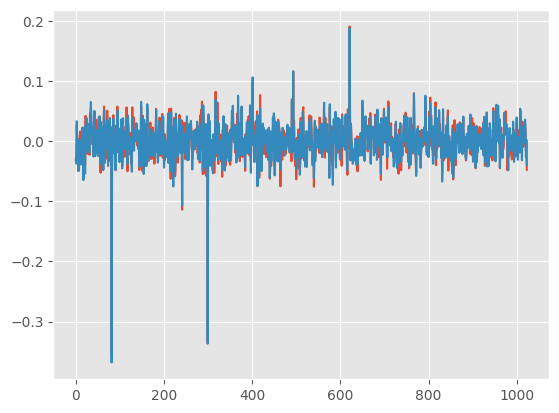

In [5]:
plt.plot(abst_vectors_norm_biogpt[0])
plt.plot(abst_vectors_norm_biogpt[1])

In [8]:
pca_biogpt = PCA().fit(abst_vectors_norm_biogpt)
pca_var_biogpt = np.cumsum(pca_biogpt.explained_variance_ratio_)

svd_content_biogpt = TruncatedSVD(n_iter= 25, n_components = 1024 ).fit(abst_vectors_norm_biogpt)
svd_var_biogpt = np.cumsum(svd_content_biogpt.explained_variance_ratio_)

PCA 100% : 152
SVD 100% : 153
PCA 95% : 89
SVD 95% : 89
PCA 90% : 57
SVD 90% : 58
SVD 82% : 34
SVD 82% : 34


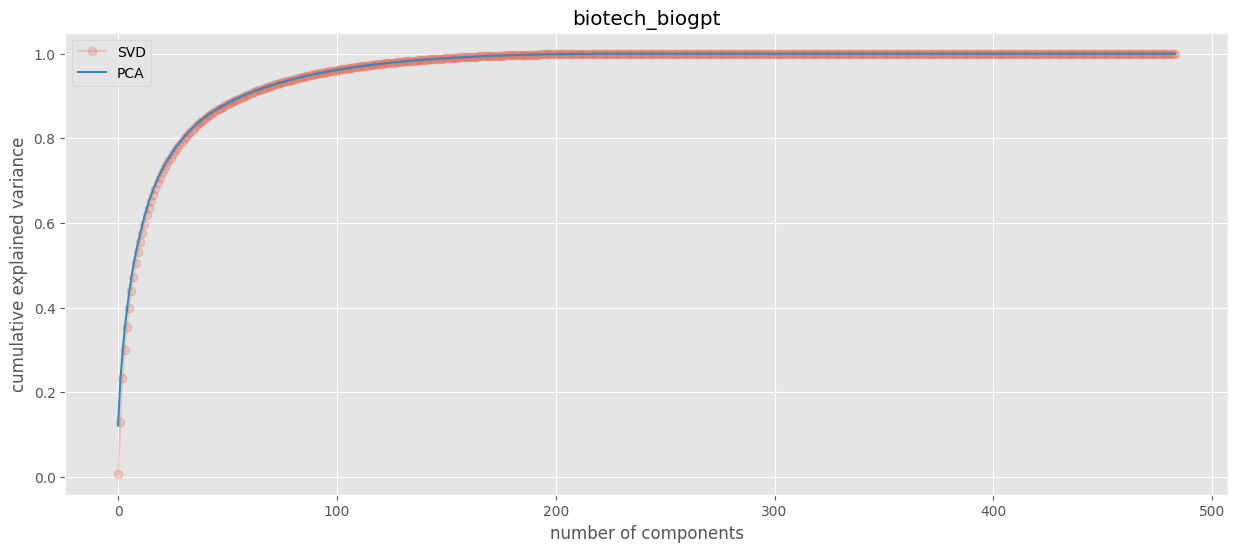

In [15]:
plt.figure(figsize = (15,6))
plt.plot(svd_var_biogpt, marker = 'o', alpha =0.2)
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');
plt.title('biotech_biogpt')
# plt.figure(figsize = (15,6))
plt.plot(pca_var_biogpt)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(['SVD','PCA'])
print('PCA 100% :',np.where(np.array(pca_var_biogpt) >= 0.99)[0][0])
print('SVD 100% :',np.where(np.array(svd_var_biogpt) >= 0.99)[0][0])
print('PCA 95% :',np.where(np.array(pca_var_biogpt) >= 0.95)[0][0])
print('SVD 95% :',np.where(np.array(svd_var_biogpt) >= 0.95)[0][0])
print('PCA 90% :',np.where(np.array(pca_var_biogpt) >= 0.90)[0][0])
print('SVD 90% :',np.where(np.array(svd_var_biogpt) >= 0.90)[0][0])
print('SVD 82% :',np.where(np.array(pca_var_biogpt) >= 0.82)[0][0])
print('SVD 82% :',np.where(np.array(svd_var_biogpt) >= 0.82)[0][0])

In [16]:
biotech_abstract_norm_biogpt_large = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large/data_biotech_abstract_biogpt_large_norm.npy')
biotech_title_norm_biogpt_large = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large/data_biotech_title_biogpt_large_norm.npy')

biotech_abstract_norm_biogpt_large_pubmed_qa = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large_pubmed_qa/data_biotech_abstract_biogpt_Large_PubMedQA_norm.npy')
biotech_title_norm_biogpt_large_pubmed_qa = np.load('drive/MyDrive/transfer/biogpt_variants/biogpt_large_pubmed_qa/data_biotech_title_biogpt_Large_PubMedQA_norm.npy')
     

In [17]:
print('biogpt_large',biotech_title_norm_biogpt_large.shape)
print('biogpt_large_pubmed',biotech_title_norm_biogpt_large_pubmed_qa.shape)

biogpt_large (484, 1600)
biogpt_large_pubmed (484, 1600)


PCA 100% : 153
SVD 100% : 154
PCA 95% : 85
SVD 95% : 86
PCA 90% : 52
SVD 90% : 53


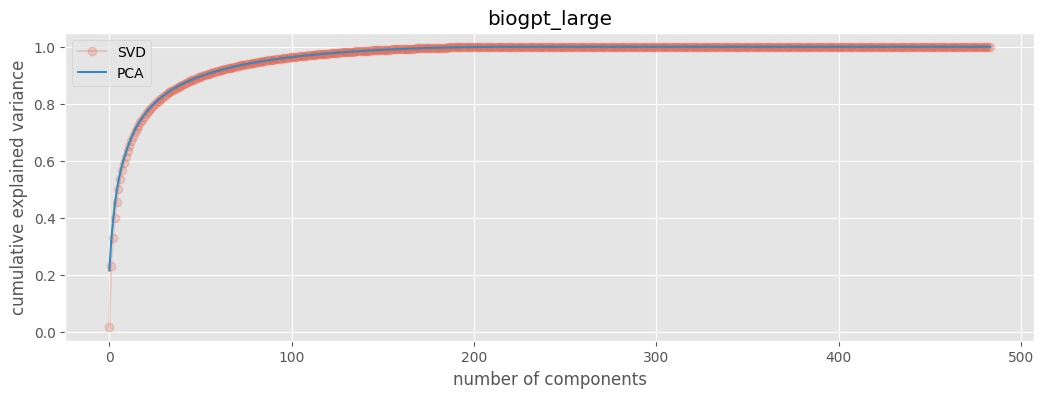

In [19]:
pca_biogpt_large = PCA().fit(biotech_abstract_norm_biogpt_large)
pca_var_biogpt_large = np.cumsum(pca_biogpt_large.explained_variance_ratio_)

svd_content_biogpt_large = TruncatedSVD(n_iter= 25, n_components = 1600 ).fit(biotech_abstract_norm_biogpt_large)
svd_var_biogpt_large = np.cumsum(svd_content_biogpt_large.explained_variance_ratio_)
     
plt.figure(figsize = (12.5,4))
plt.plot(svd_var_biogpt_large, marker = 'o', alpha =0.2)
plt.plot(pca_var_biogpt_large)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(['SVD','PCA'])
plt.title('biogpt_large');

print('PCA 100% :',np.where(np.array(pca_var_biogpt_large) >= 0.99)[0][0])
print('SVD 100% :',np.where(np.array(svd_var_biogpt_large) >= 0.99)[0][0])
print('PCA 95% :',np.where(np.array(pca_var_biogpt_large) >= 0.95)[0][0])
print('SVD 95% :',np.where(np.array(svd_var_biogpt_large) >= 0.95)[0][0])
print('PCA 90% :',np.where(np.array(pca_var_biogpt_large) >= 0.90)[0][0])
print('SVD 90% :',np.where(np.array(svd_var_biogpt_large) >= 0.90)[0][0])

PCA 100% : 158
SVD 100% : 159
PCA 95% : 91
SVD 95% : 92
PCA 90% : 57
SVD 90% : 58


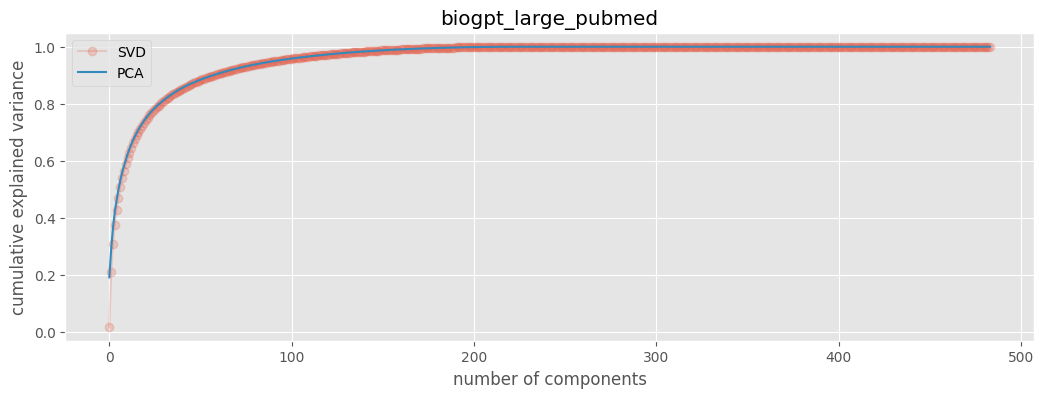

In [20]:


pca_biogpt_large_pubmed_qa = PCA().fit(biotech_abstract_norm_biogpt_large_pubmed_qa)
pca_var_biogpt_large_pubmed_qa = np.cumsum(pca_biogpt_large_pubmed_qa.explained_variance_ratio_)

svd_content_biogpt_large_pubmed_qa = TruncatedSVD(n_iter= 25, n_components = 1600 ).fit(biotech_abstract_norm_biogpt_large_pubmed_qa)
svd_var_biogpt_large_pubmed_qa = np.cumsum(svd_content_biogpt_large_pubmed_qa.explained_variance_ratio_)
     
plt.figure(figsize = (12.5,4))
plt.plot(svd_var_biogpt_large_pubmed_qa, marker = 'o', alpha =0.2)
plt.plot(pca_var_biogpt_large_pubmed_qa)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(['SVD','PCA'])
plt.title('biogpt_large_pubmed')
     
print('PCA 100% :',np.where(np.array(pca_var_biogpt_large_pubmed_qa) >= 0.99)[0][0])
print('SVD 100% :',np.where(np.array(svd_var_biogpt_large_pubmed_qa) >= 0.99)[0][0])
print('PCA 95% :',np.where(np.array(pca_var_biogpt_large_pubmed_qa) >= 0.95)[0][0])
print('SVD 95% :',np.where(np.array(svd_var_biogpt_large_pubmed_qa) >= 0.95)[0][0])
print('PCA 90% :',np.where(np.array(pca_var_biogpt_large_pubmed_qa) >= 0.90)[0][0])
print('SVD 90% :',np.where(np.array(svd_var_biogpt_large_pubmed_qa) >= 0.90)[0][0])